___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

## Parte 1: Dicionário dos Dados

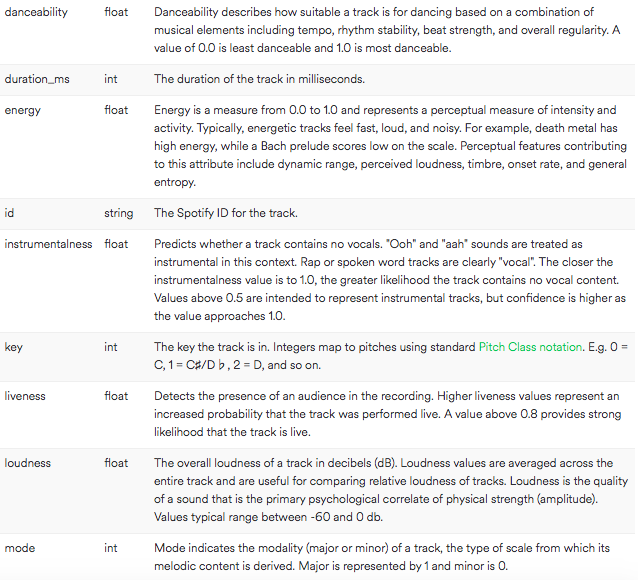

In [19]:
from IPython.display import Image
Image(filename=('/Users/RebecaMoreno/Desktop/dic.png'))

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Carla Kim\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Carla Kim\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Carla Kim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\C

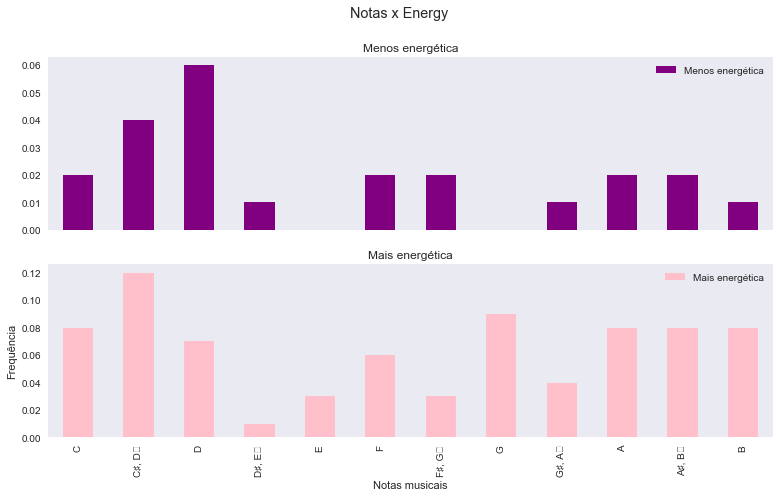

In [3]:
#criando uma nova coluna somente para o KEY CATEGÓRICO, ou seja, só com as notas (strings)
spotdata.notakey = spotdata.key
spotdata.notakey = spotdata.notakey.astype('category')
l = ['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B']
spotdata.notakey.cat.categories = (l)
#criando uma nova coluna somente para o ENERGY CATEGÓRICO, ou seja, só com dois grupos (strings)
spotdata.energyy = spotdata.energy
#filtrando...
spotdata.energyy[(spotdata.energyy >= 0) & (spotdata.energyy < 0.5)] = [0]
spotdata.energyy[(spotdata.energyy >= 0.5) & (spotdata.energyy < 1)] = [1]
spotdata.energyy = spotdata.energyy.astype('category')
spotdata.energyy.cat.categories = (['Menos energética','Mais energética'])
#criando uma nova coluna somente para o MODE CATEGÓRICO, ou seja, só com os dois grupos (strings)
df = pd.DataFrame()
spotdata['tom'] = spotdata['mode']
spotdata['tom'] = spotdata.tom.astype('category')
spotdata.tom.cat.categories = (['Menor','Maior'])

#tabela de notas por energy
NotaEnergy = pd.crosstab(spotdata.notakey,spotdata.energyy, normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])
NotaEnergy.plot(kind = 'bar',title = 'Notas x Energy',figsize=(13,7),color = ('purple','pink'),grid=False,subplots=True)
plt.ylabel('Frequência')
plt.show()

In [4]:
#tabela de frequência das notas (key)
ut1 = pd.crosstab(spotdata.notakey,'Frequências', colnames=['Notas musicais'])
ut1

Notas musicais,Frequências
key,
C,10
"C♯, D♭",16
D,13
"D♯, E♭",2
E,3
F,8
"F♯, G♭",5
G,9
"G♯, A♭",5


In [5]:
ut2 = pd.crosstab(spotdata.notakey,spotdata.tom, colnames=['Notas musicais'])
ut2

Notas musicais,Menor,Maior
key,,
C,2,8
"C♯, D♭",5,11
D,1,12
"D♯, E♭",1,1
E,3,0
F,6,2
"F♯, G♭",1,4
G,1,8
"G♯, A♭",1,4


C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

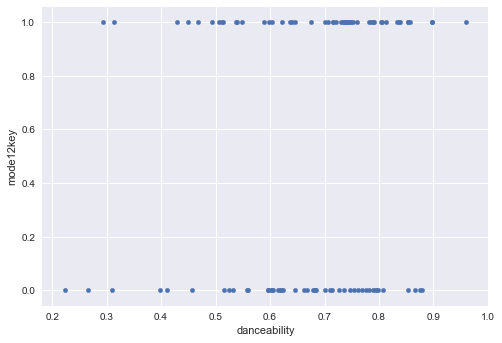

In [6]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)
#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "danceability", y = "mode12key")

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


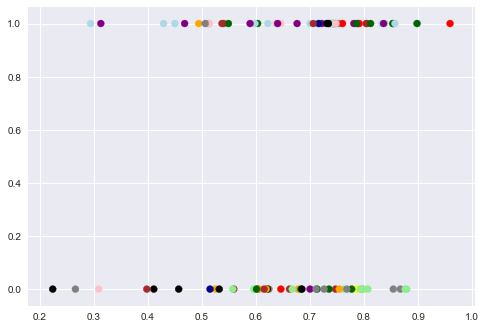

In [14]:
spotdata["notas"]=spotdata["key"]    
spotdata['notas'] = spotdata['notas'].map({0: "C", 1: "C♯, D♭", 2: "D", 3: "D♯, E♭", 4: "E", 5: "F", 6: "F♯, G♭", 7: "G", 8: "G♯, A♭", 9: "A", 10: "A♯, B♭", 11: "B"})

fig, ax = plt.subplots()
colors = {'C':'lightgreen', 'C♯, D♭':'darkgreen', 'D':'lightblue', 'D♯, E♭':'darkblue', 'E':'yellow', 'F':'orange', 'F♯, G♭':'pink', 'G':'purple', 'G♯, A♭':'red', 'A':'brown', 'A♯, B♭':'gray', 'B':'black'}
ax.scatter(spotdata['danceability'], spotdata['mode12key'], c=spotdata['notas'].apply(lambda x: colors[x]))


## Parte 3: Gráfico da regressão e da probabilidade

In [8]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata['mode12key']
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


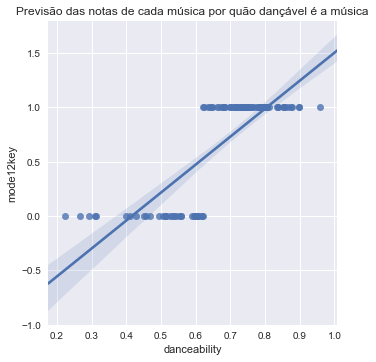

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


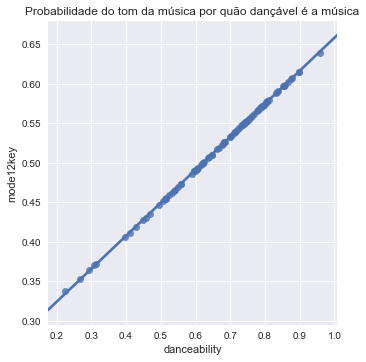

In [9]:
#gráfico da regressão logística das notas de cada música baseada em danceability
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')
plt.show()

#gráfico da probabilidade por danceability
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]
sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico acima indica uma previsão do programa com relação às músicas de forma que, músicas mais dançantes possuem maior probabilidade de serem de tons maiores. Assim, de acordo com o gráfico obtido anteriormente de frequência das notas com relação aos tons, temos que essas notas provavelmente são: D, C#/D, C ou G, respectivamente. Já os menos dançantes, provavelmente são: B, A#/B, F e C#/D, respectivamente.

O gráfico acima comprova que, para dançabilidades baixas, a probalidade maior é que o tom da música seja mais baixo e vice-versa.

In [10]:
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[ 0.67173525  0.32826475]]
[[ 0.55153401  0.44846599]]
[[ 0.4249947  0.5750053]]


A primeira coluna diz respeito ao grupo de notas com o tom menor, mostrando a exata chance de se ter, por exemplo, uma dançabilidade de 0.2 com o tom menor. No caso da danceability ser igual a 0.2, a probabilidade de se ter tal danceability com tom menor é 0.67173525. Enquanto que, na segunda coluna, temos as mesmas informações, porém referentes ao grupo de notas com tom maior.

## Parte 2: Realizando a regressão e Encontrando o beta

In [53]:
#train_cols = spotdata.columns[1:]

logit = sm.Logit(spotdata['danceability'], spotdata['mode12key_pred_class'])
result = logit.fit()
print(result)

logit2 = sm.Logit(spotdata['danceability'], spotdata['mode12key'])
result2 = logit2.fit()
print(result2)

logit3 = sm.Logit(spotdata['danceability'], spotdata['energy'])
result3 = logit3.fit()
print(result3)

#logit4 = sm.Logit(spotdata['danceability'], spotdata['k'])
#result4 = logit4.fit()
#print(result4)

Optimization terminated successfully.
         Current function value: 0.530908
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625494
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602485
         Iterations 4


In [35]:
print (result.summary())
print (result2.summary())
print (result3.summary())

                           Logit Regression Results                           
Dep. Variable:           danceability   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Nov 2017   Pseudo R-squ.:                 0.09491
Time:                        16:19:56   Log-Likelihood:                -53.091
converged:                       True   LL-Null:                       -58.658
                                        LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
mode12key_pred_class     1.1449      0.290      3.950      0.000       0.577       1.713
                           Logit Regression Results                           
Dep. Variable:        

In [37]:
print (result.conf_int())
print (result2.conf_int())
print (result3.conf_int())

                             0         1
mode12key_pred_class  0.576859  1.713012
                  0         1
mode12key  0.201352  1.373951
               0         1
energy  0.265962  1.221921


In [44]:
print (np.exp(result.params))
print (np.exp(result2.params))
print (np.exp(result3.params))

mode12key_pred_class    3.142238
dtype: float64
mode12key    2.198229
dtype: float64
energy    2.104213
dtype: float64


In [19]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                          2.5%    97.5%        OR
mode12key_pred_class  1.780437  5.54564  3.142238


In [46]:
params = result2.params
conf2 = result2.conf_int()
conf2['OR'] = params
conf2.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf2))

               2.5%     97.5%        OR
mode12key  1.223056  3.950931  2.198229


In [47]:
params = result3.params
conf3 = result3.conf_int()
conf3['OR'] = params
conf3.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf3))

            2.5%     97.5%        OR
energy  1.304685  3.393701  2.104213


In [57]:
dummy_ranks = pd.get_dummies(spotdata['energy'], prefix='energy')
print (dummy_ranks.head())
#trasnformar energy em binarios, ou seja, eh energetico ou nao

   energy_0.0  energy_1.0
0           1           0
1           1           0
2           1           0
3           1           0
4           0           1


In [61]:
cols_to_keepp = ['mode','danceability', 'mode12key']
dataff = spotdata[cols_to_keep].join(dummy_ranks.ix[:, 'energy_0':])
print (dataff.head())
#ordenando as informaoes, com o MODE, tom, como a variavel que queremos descobrir

   mode  danceability  mode12key  energy_0.0  energy_1.0
0     1         0.833          1           1           0
1     1         0.743          1           1           0
2     1         0.838          1           1           0
3     1         0.494          1           1           0
4     0         0.678          0           0           1


In [62]:
dataff['intercept'] = 1.0

In [63]:
import statsmodels.api as sm
train_cols = dataff.columns[1:]
logitt = sm.Logit(dataff['mode'], dataff[train_cols])
resultt = logitt.fit()

         Current function value: 0.193012
         Iterations: 35


C:\Users\Carla Kim\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
print (resultt.summary())

                           Logit Regression Results                           
Dep. Variable:                   mode   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Nov 2017   Pseudo R-squ.:                  0.7132
Time:                        19:38:29   Log-Likelihood:                -19.301
converged:                      False   LL-Null:                       -67.301
                                        LLR p-value:                 1.126e-20
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
danceability     7.0529      3.913      1.803      0.071      -0.616      14.722
mode12key       33.6609   8.85e+05    3.8e-05      1.000   -1.73e+06    1.74e+06
energy_0.0      -1.5801    6.6e+07  -2.39e-0

In [65]:
print (resultt.conf_int())

                         0             1
danceability -6.158839e-01  1.472168e+01
mode12key    -1.734998e+06  1.735065e+06
energy_0.0   -1.293190e+08  1.293190e+08
energy_1.0   -1.293190e+08  1.293190e+08
intercept    -1.293190e+08  1.293190e+08


In [66]:
print (np.exp(result.params))

danceability    1.156204e+03
mode12key       4.156505e+14
energy_0.0      2.059485e-01
energy_1.0      7.795694e-02
intercept       1.605510e-02
dtype: float64
